<h1>Aikasarjat Pythonilla</h1>

Latasin ensin Alma Media Oyj:n päätöskurssien aikasarjat viimeisen kahden vuoden ajalta ja OMX Helsinki 25 -indeksin arvot vuodesta 2015.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

<h2>Aikasarjan avaaminen ja valmistelu</h2>

Seuraavassa käytettävät aikasarjat olen tallentanut sivulta http://www.nasdaqomxnordic.com/osakkeet/historiallisetkurssitiedot

Muunnan Pandas-kirjaston <b>to_datetime()</b>-funktiolla päivämäärämuotoilut Pandas-kirjaston ymmärtämään muotoiluun.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

Aikaleimat täytyy sijoittaa dataframen indeksiin, jotta aikasarjatoiminnoista saa täyden hyödyn.

Järjestän aikasarjan vanhimmasta uusimpaan.

In [2]:
#Avataan tiedostot
alma = pd.read_csv('http://www.haaga-helia.fi/~a1703294/Rahoituksen-Excel/ALMA-2017-03-22-2019-04-22.csv', sep = ';', decimal = ',', usecols = [0,1,2,3,4,5,6,7,8,9,10])
markkinat = pd.read_csv('http://www.haaga-helia.fi/~a1703294/Rahoituksen-Excel/HEX25-2015-01-01-2019-04-23.csv', sep = ';', decimal = ',', usecols = [0,1,2,3])

#Lisätään aikaleimat
alma.index = pd.to_datetime(alma['Date'], dayfirst=True)
markkinat.index = pd.to_datetime(markkinat['Date'], dayfirst=True)

#Järjestetään aikasarja vanhimmasta uusimpaan
alma.sort_index(inplace = True)
markkinat.sort_index(inplace = True)

In [3]:
#Näytetään Alma Median viisi ensimmäistä riviä
alma.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,,
2017-03-22,22.3.2017,5.34,5.36,5.37,5.37,5.28,5.34,5.327,13044,69483.27,50
2017-03-23,23.3.2017,5.21,5.28,5.22,5.25,5.19,5.21,5.217,13052,68093.73,60
2017-03-24,24.3.2017,5.18,5.20,5.14,5.20,5.14,5.20,5.170,19502,100826.66,73
2017-03-27,27.3.2017,5.20,5.25,5.15,5.25,5.10,5.25,5.188,18159,94198.91,44
2017-03-28,28.3.2017,5.16,5.19,5.16,5.19,5.13,5.18,5.176,12498,64685.82,39


In [4]:
#Näytetään markkinoiden viisi ensimmäistä riviä
markkinat.head()

,Date,High price,Low price,Closing price
Date,,,,
2015-01-02,2.1.2015,3022.43,2993.02,3007.11
2015-01-05,5.1.2015,3023.03,2947.22,2947.53
2015-01-07,7.1.2015,2961.35,2920.84,2929.82
2015-01-08,8.1.2015,2986.39,2952.31,2985.03
2015-01-09,9.1.2015,3001.76,2958.82,2968.38


<h2>Aikasarjan kuvaaminen</h2>

Funktio <b>plot()</b> piirtää viivakuvion.

Text(0,0.5,'Euroa')

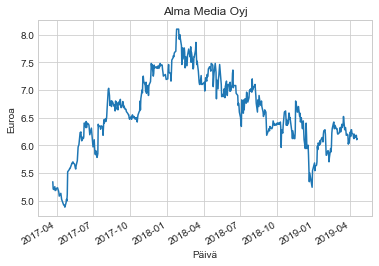

In [5]:
#Piirretään päätöskurssin aikasarjasta viivakuvio
alma['Closing price'].plot()
plt.title('Alma Media Oyj')
plt.xlabel('Päivä')
plt.ylabel('Euroa')

Text(0,0.5,'Euroa')

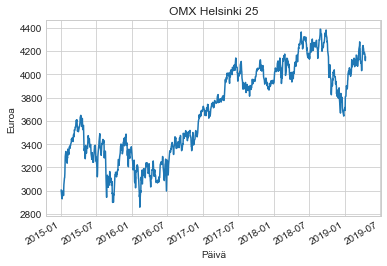

In [6]:
#Piirretään markkinoiden aikasarjasta viivakuvio
markkinat['Closing price'].plot()
plt.title('OMX Helsinki 25')
plt.xlabel('Päivä')
plt.ylabel('Euroa')

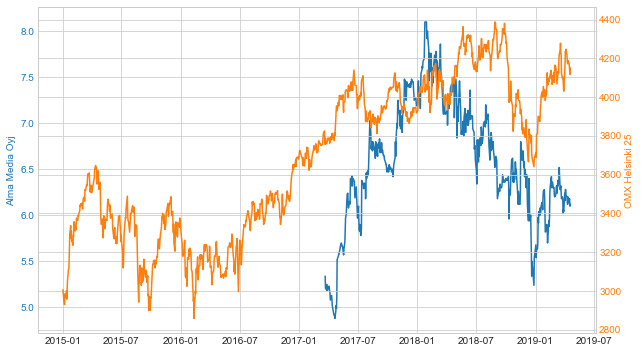

In [7]:
#Piirretään päätöskurssit ja markkinoiden aikasarjat samaan viivakuvioon

#Luodaan figure- ja axes-oliot
fig1, ax1 = plt.subplots(figsize = (10, 6))

#Määritetään ax1-olio:
color = 'C0'
ax1.set_ylabel('Alma Media Oyj', color=color)
ax1.plot(alma['Closing price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Luodaan toinen axes-olio, jolla on yhteinen x-akseli ax1-olion kanssa:
ax2 = ax1.twinx()

color = 'C1'
ax2.set_ylabel('OMX Helsinki 25', color=color)
ax2.plot(markkinat['Closing price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

<h2>Päivämuutokset tuottoprosentteina</h2>

Prosenttimuutokset lasketaan Pandas-kirjaston <b>pct_change()</b>-funktiolla ja ne yhdistetään samaan dataframeen <b>concat()</b>-funktiolla.

In [8]:
#Lasketaan muutokset
alma['Alma Median päivämuutosprosentti'] = alma['Closing price'].pct_change()
markkinat['Markkinoiden päivämuutosprosentti'] = markkinat['Closing price'].pct_change()
muutokset = pd.concat([alma['Alma Median päivämuutosprosentti'], markkinat['Markkinoiden päivämuutosprosentti']], axis=1)
#Muutetaan luvut prosenteiksi ja pyöristetään kahden desimaalin tarkkuuteen
muutokset['Alma Median päivämuutosprosentti'] = pd.Series(["{0:.2f}%".format(val * 100) for val in muutokset['Alma Median päivämuutosprosentti']], index = muutokset.index)
muutokset['Markkinoiden päivämuutosprosentti'] = pd.Series(["{0:.2f}%".format(val * 100) for val in muutokset['Markkinoiden päivämuutosprosentti']], index = muutokset.index)
#Tulostetaan muutokset-taulukko
muutokset

,Alma Median päivämuutosprosentti,Markkinoiden päivämuutosprosentti
Date,,
2015-01-02,nan%,nan%
2015-01-05,nan%,-1.98%
2015-01-07,nan%,-0.60%
2015-01-08,nan%,1.88%
2015-01-09,nan%,-0.56%
2015-01-12,nan%,0.15%
2015-01-13,nan%,0.99%
2015-01-14,nan%,-1.48%
2015-01-15,nan%,1.44%


Text(0,0.5,'Päivämuutosprosentti')

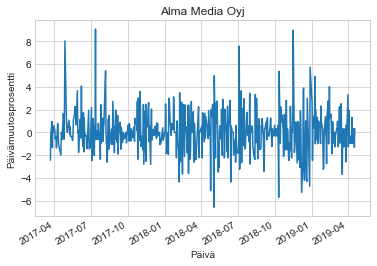

In [9]:
muutos = alma['Closing price'].pct_change()*100
muutos.plot()
plt.title('Alma Media Oyj')
plt.xlabel('Päivä')
plt.ylabel('Päivämuutosprosentti')

Text(0,0.5,'Päivämuutosprosentti')

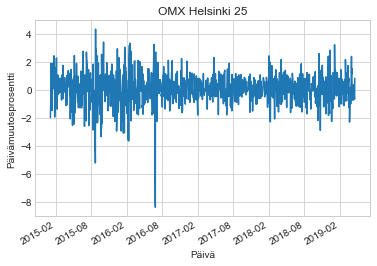

In [10]:
muutos = markkinat['Closing price'].pct_change()*100
muutos.plot()
plt.title('OMX Helsinki 25')
plt.xlabel('Päivä')
plt.ylabel('Päivämuutosprosentti')

In [11]:
#Lasketaan, miten muutosprosentit korreloivat:
alma['Alma_change'] = alma['Closing price'].pct_change()
markkinat['Markkinat_change'] = markkinat['Closing price'].pct_change()
pd.concat([alma['Alma_change'], markkinat['Markkinat_change']], axis=1).corr()

,Alma_change,Markkinat_change
Alma_change,1.00000,0.26983
Markkinat_change,0.26983,1.00000


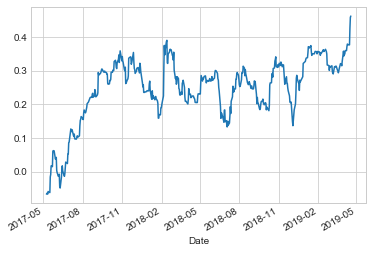

In [12]:
#Liukuva korrelaatio kertoo, miten Alma Median ja OMX Helsinki 25 -indeksin muutosprosentti korreloivat eri aikoina:
korrelaatio = alma['Alma_change'].rolling(90,min_periods=30).corr(markkinat['Markkinat_change'])
korrelaatio.plot()

<h2>Liukuva keskiarvo</h2>

Liukuva keskiarvo tasoittaa aikasarjan satunnaista vaihtelua.

<b>rolling()</b>-funktiolla voin laskea liukuvia keskiarvoja haluamalleni aikajänteelle.

Text(0,0.5,'Euroa')

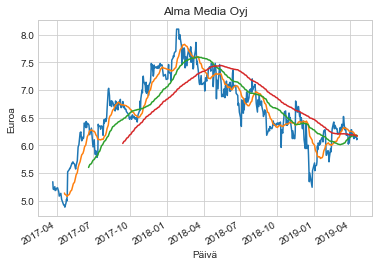

In [13]:
#Piirretään samaan kuvaan viivakuvio päätöskursseista ja niiden 20, 60 ja 120 havainnon liukuva keskiarvo
alma['Closing price'].plot()
alma['Closing price'].rolling(20).mean().plot()
alma['Closing price'].rolling(60).mean().plot()
alma['Closing price'].rolling(120).mean().plot()
plt.title('Alma Media Oyj')
plt.xlabel('Päivä')
plt.ylabel('Euroa')

<h2>Volatiliteetti</h2>

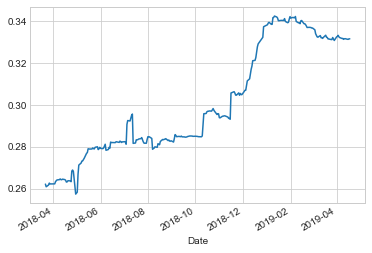

In [14]:
#Lasketaan ja piirretään Alma Median osakkeen volatiliteetti:
(alma['Alma_change'].rolling(252).std()*(252**0.5)).plot()

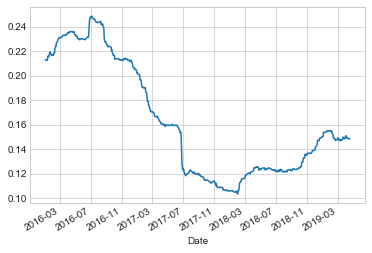

In [15]:
#Lasketaan ja piirretään markkinoiden volatiliteetti:
(markkinat['Markkinat_change'].rolling(252).std()*(252**0.5)).plot()